In [20]:
import pandas as pd

ev_data = pd.read_csv(r'C:\Users\sidxa\OneDrive\Desktop\Portfolio\Dataset\Electric_Vehicle_Population_Data.csv')

print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [22]:
#Cleaning up data
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [24]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [26]:
#Deleting null values
ev_data = ev_data.dropna()

In [28]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [55]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

C:\Users\sidxa\AppData\Local\Temp\ipykernel_7140\2334177409.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="magma")


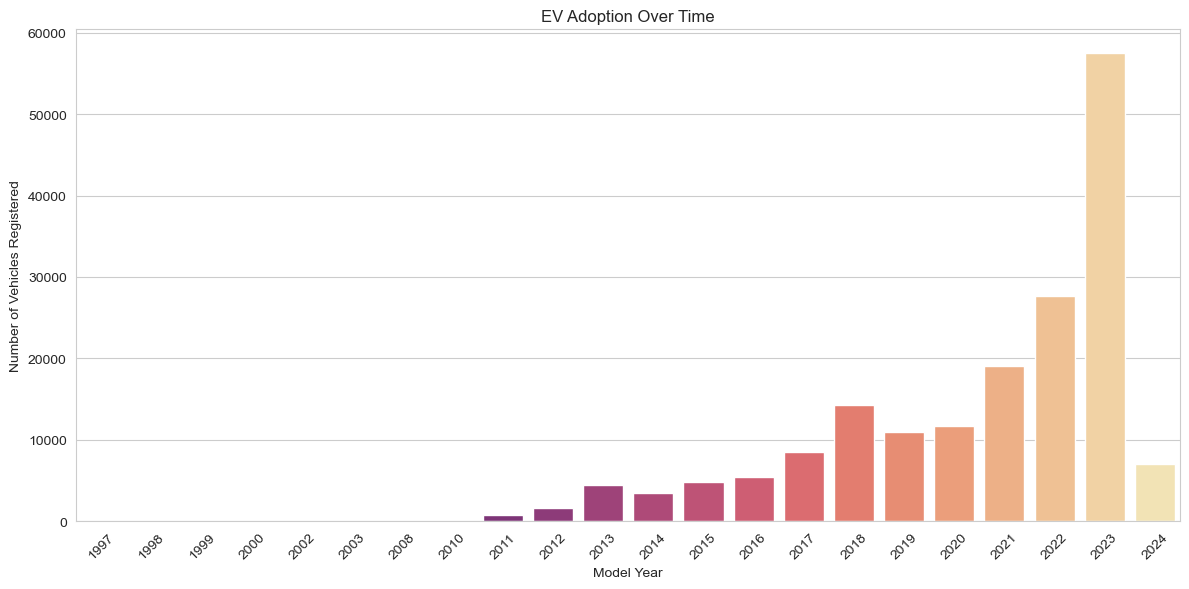

In [32]:
# 1. EV Adoption Over Time
plt.figure(figsize=(12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="magma")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
#We can see that there is a significant upward trend starting around 2016 with the number of vehicles registered peaking in 2023.

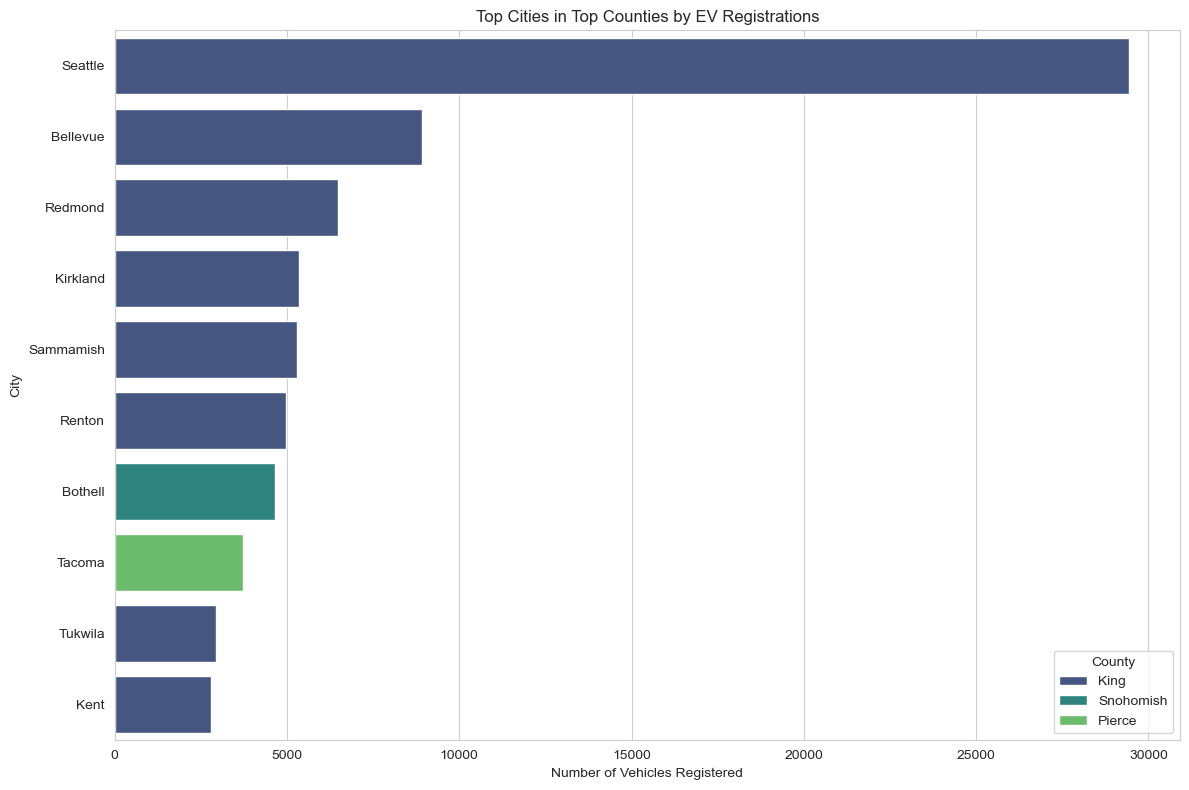

In [36]:
# 2. Analyzing top 3 counties by EV Registration
#Geographical distribution at county level
ev_county_dist = ev_data['County'].value_counts()
top_counties = ev_county_dist.head(3).index

#Filtering dataset for these counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

#Analyzing EV Distribution within cities in the top counties
ev_city_dist_top_counties = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

#Visualizing top 10 cities across these counties
top_cities = ev_city_dist_top_counties.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="viridis")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

In [38]:
#We can see that EV adoption is not uniform across cities and is concentrated in certain cities counties like King, Snohomish etc.

C:\Users\sidxa\AppData\Local\Temp\ipykernel_7140\3914035422.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="mako")


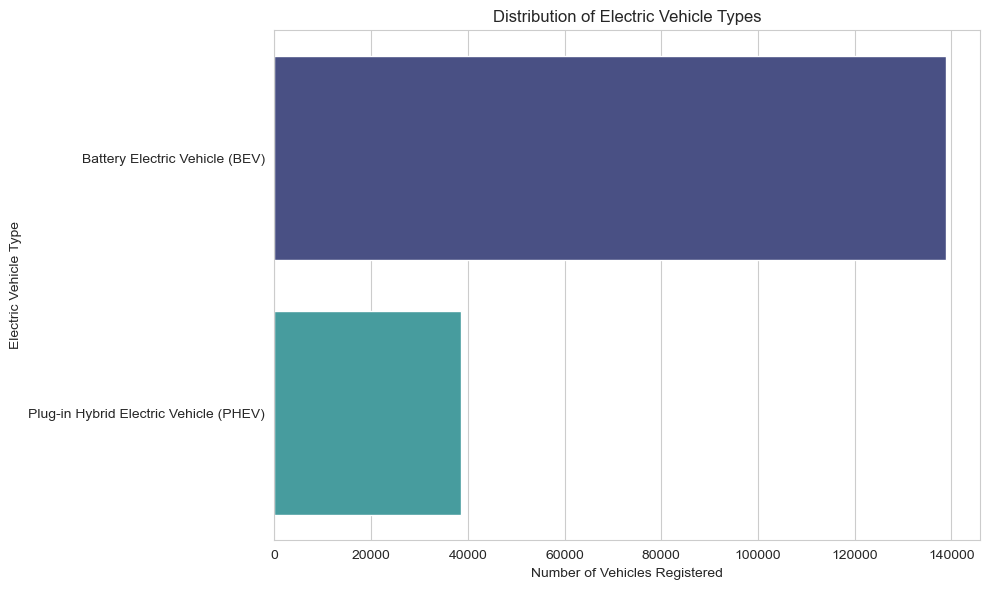

In [40]:
#3. Analyzing distribution of EV Types

ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="mako")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

In [42]:
#This graph shows us that BEVs are preferred over PHEVs among those registered in United States

C:\Users\sidxa\AppData\Local\Temp\ipykernel_7140\377979389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_dist.values, y=ev_make_dist.index, palette="cubehelix")


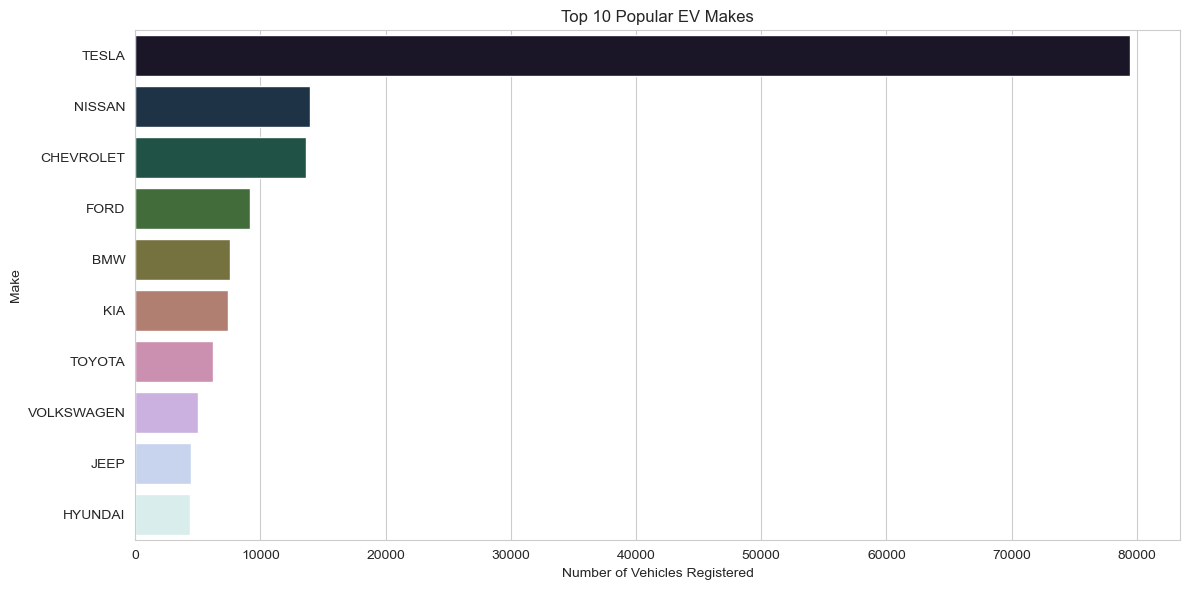

In [44]:
#4. Analyzing the popularity of EV manufacturers 
ev_make_dist = ev_data['Make'].value_counts().head(10)  #Limiting to 10 for clarity

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_dist.values, y=ev_make_dist.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [46]:
#We can see that Tesla leads by a substantial margin compared to other manufacturers. Nissan, Chevrolet and Ford follow, but have significantly less vehicles registered

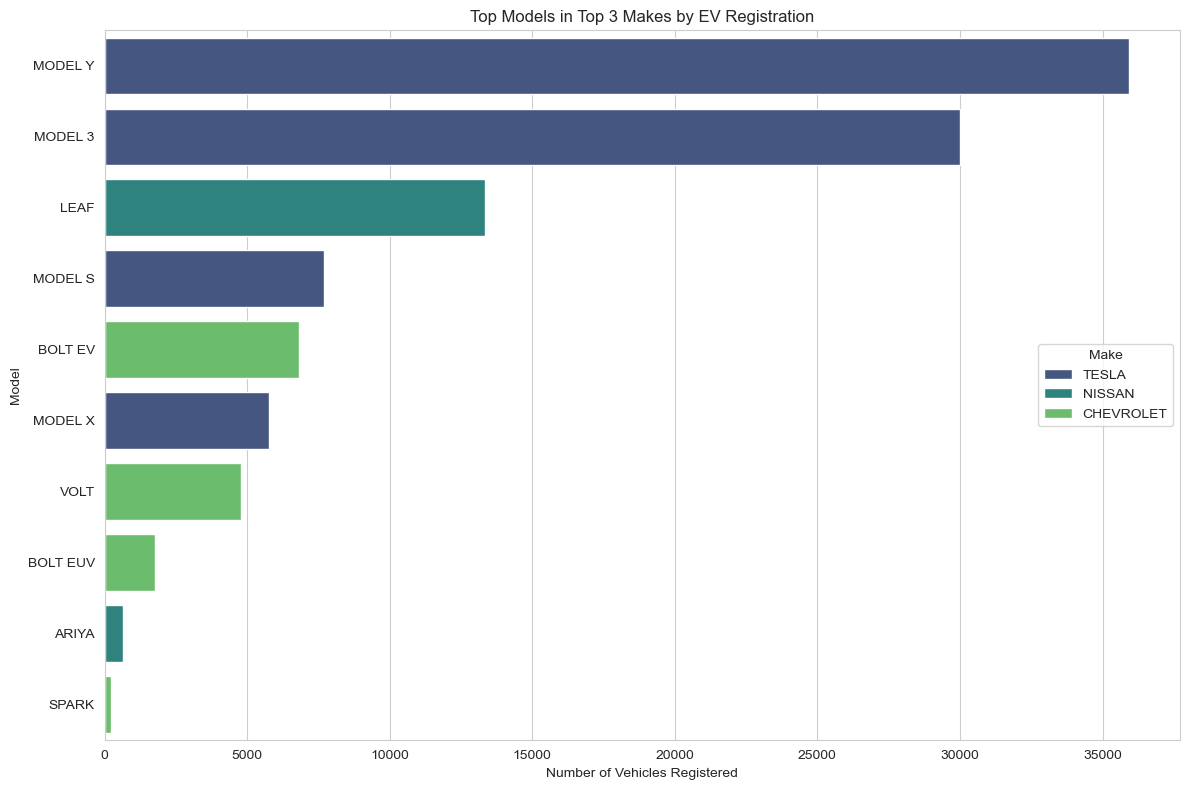

In [48]:
#5. Analyzing popular models of top manufacturers 

#Selecting top 3 manufacturers based on number of vehicles registered
top_3_makes = ev_make_dist.head(3).index

#Filtering dataset for top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

#Analyzing popularity of EV models within top manufacturers
ev_model_dist_top_makes = top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

#Visualizing top 10 models across manufacturers
top_models = ev_model_dist_top_makes.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x = 'Number of Vehicles', y = 'Model', hue = 'Make', data = top_models, palette = "viridis")
plt.title('Top Models in Top 3 Makes by EV Registration')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

In [50]:
#Tesla's Model Y and Model 3 are the most registered vehicles, followed by Nissan Leaf and Tesla Model S. 

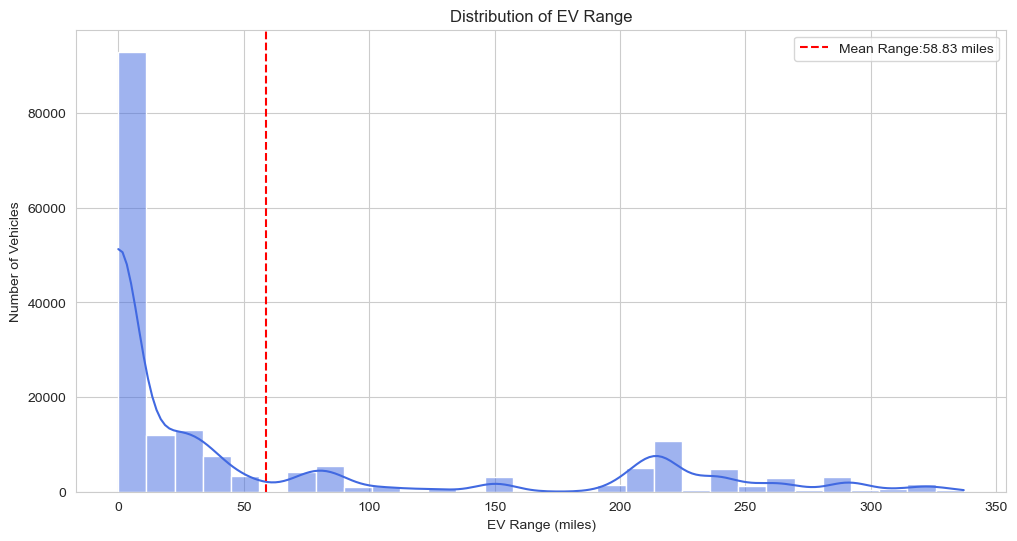

In [59]:
#6. Analyzing the distribution of EV range
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'], bins = 30, kde= True, color = 'royalblue')
plt.title('Distribution of EV Range')
plt.xlabel('EV Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range:{ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

In [61]:
#There is a high frequency of vehicles with low electric range, with a significant peak just before 50 miles.
#The mean EV Range is marked at approximately 58.4 miles, which is relatively low compared to the highest ranges shown in the graph.

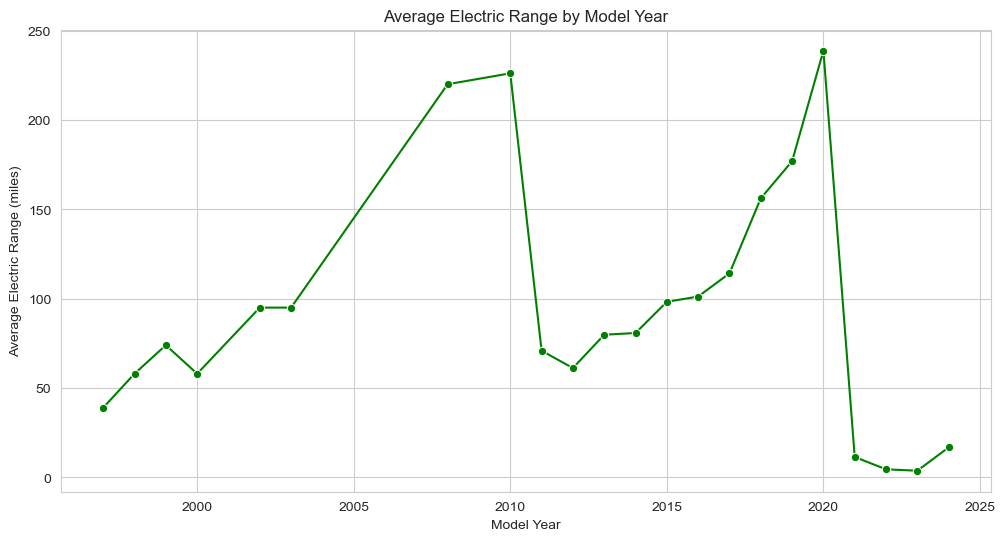

In [63]:
# 7. Calculating the average electric range model by year

avg_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x = 'Model Year', y = 'Electric Range', data = avg_range_by_year, marker = 'o', color = 'green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

In [65]:
# There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and efficiency.

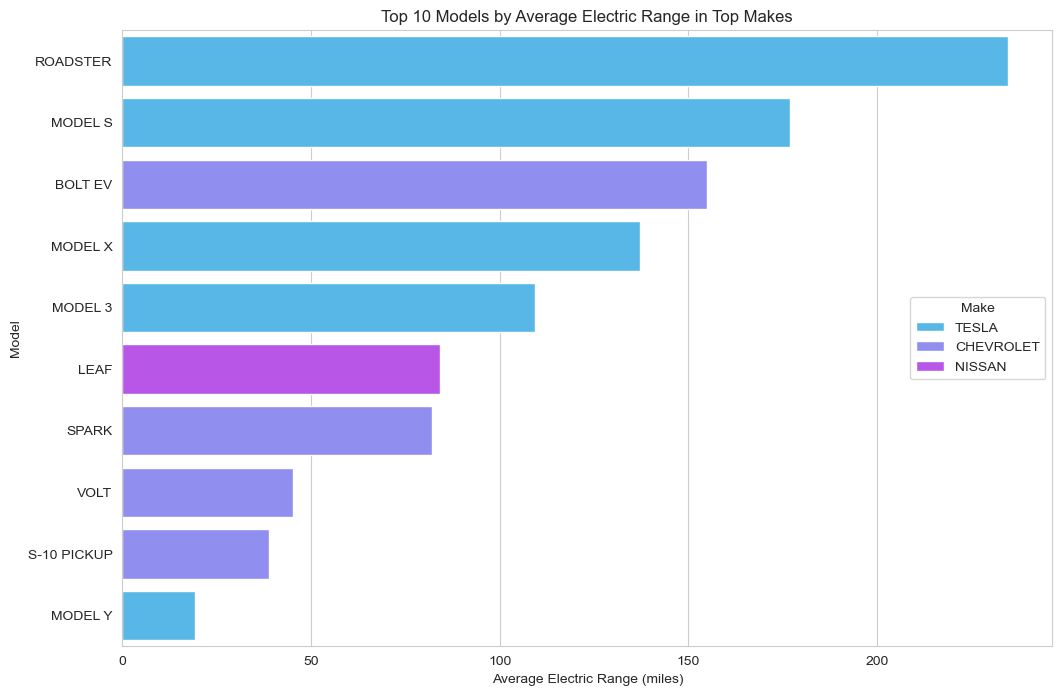

In [69]:
# 8. Top Models by Average Electric Range

avg_range_by_model = top_makes_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

top_range_models = avg_range_by_model.head(10)

plt.figure(figsize=(12,8))
barplot = sns.barplot(x = 'Electric Range', y = 'Model', hue = 'Make', data = top_range_models, palette = "cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title = 'Make', loc = 'center right')
plt.show()

In [71]:
# The Tesla Roadster has the highest average electric range among the models listed. Other models of Tesla occupy the top positions, indicating that Tesla vehicles generally have higher electric ranges.

In [73]:
# 9. Calculating Number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [77]:
# 10. Forecasting EVs registered in 2024

from scipy.optimize import curve_fit
import numpy as np

#Filter dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

#Define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

#Prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

#Fitting the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data,)

# Using the fitted function to forecast the number of EVs from 2024 to 2029 (Next 5 years)
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

#Creating a dictionary to display the forecasted values
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


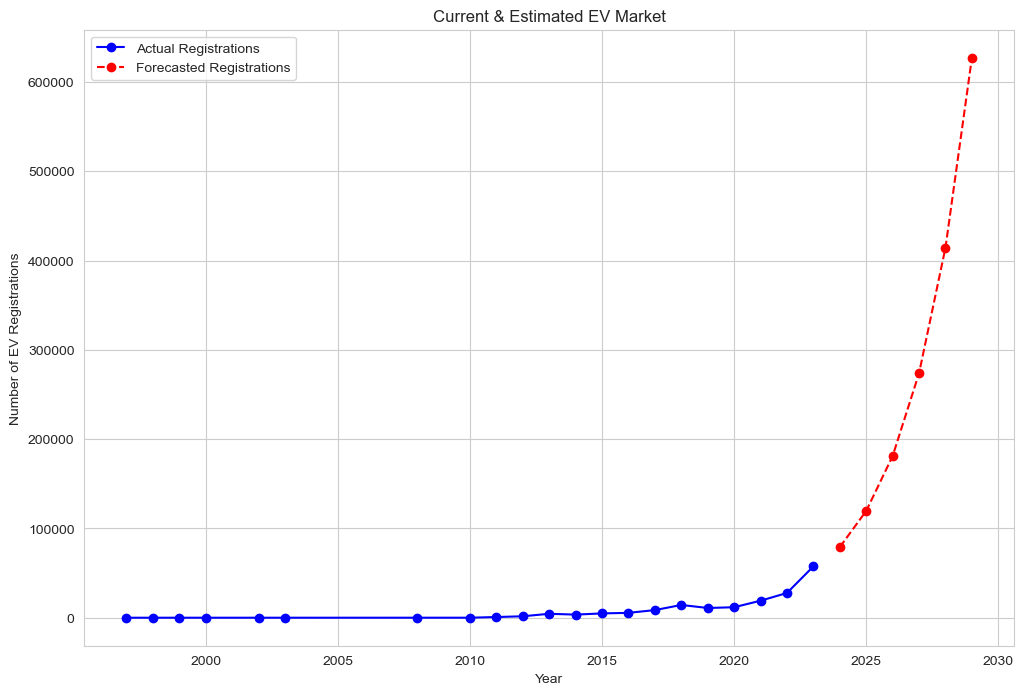

In [81]:
# 11. PLotting Estimated Market Size Data

#Preparing data for plotting 
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 +1)

#Actual and Forecasted Values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12,8))
plt.plot(actual_years, actual_values, 'bo-', label = 'Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label = 'Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

In [ ]:
# The number of actual EV registrations remained near 0 till 2010, after which there was a significant upward trend.
#The forecasted registrations predict a dramatic increase in the near future, expected to rise sharply in the coming years.